# **Box Plot**

A box plot, also known as a box-and-whisker plot, is a graphical representation of the distribution of a dataset. It provides a concise way to visualize the central tendency, spread, and skewness of the data along with identifying any potential outliers.

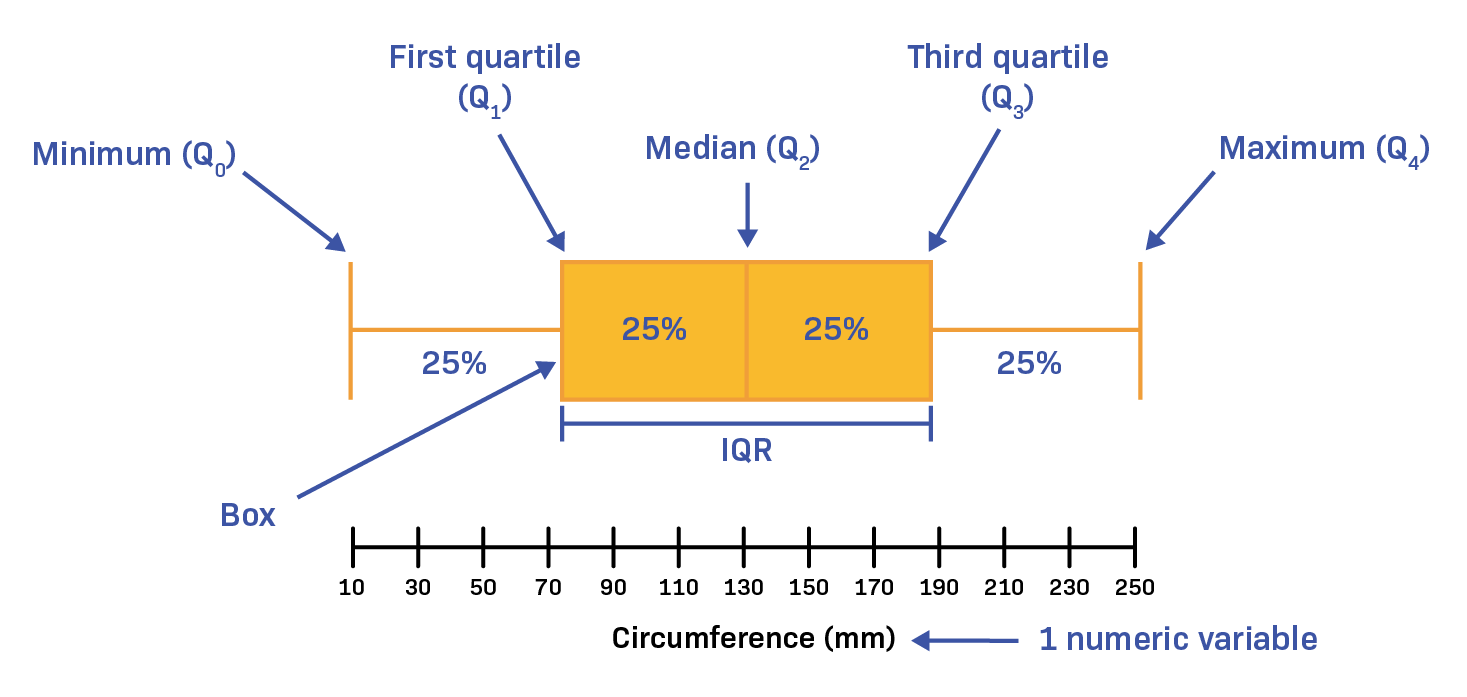

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aminawasiq","key":"d2eca9cc6cab297e3a437bbace531605"}'}

In [2]:
!pip install kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d mohithsairamreddy/salary-data

Dataset URL: https://www.kaggle.com/datasets/mohithsairamreddy/salary-data
License(s): Community Data License Agreement - Sharing - Version 1.0
  0% 0.00/16.6k [00:00<?, ?B/s]
100% 16.6k/16.6k [00:00<00:00, 25.2MB/s]


In [4]:
!unzip  /content/salary-data.zip
!ls

Archive:  /content/salary-data.zip
  inflating: Salary_Data.csv         
kaggle.json  Salary_Data.csv  salary-data.zip  sample_data


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
salary_df= pd.read_csv('/content/Salary_Data.csv')

salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [8]:
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


#**Summary Statistics**
The describe() method in pandas provides summary statistics for both numeric and categorical data, but the output differs depending on the data type of the columns. Here's how describe() works for numeric and categorical data:

**For Numeric Data:**

For numeric columns, describe() computes the following statistics:

**Count:** The number of non-null values in each column.

**Mean:** The average value of each column.

**Standard Deviation:** A measure of the dispersion of values around the mean.

**Minimum**: The smallest value in each column.

**25th Percentile (Q1):** The value below which 25% of the data falls.

**50th Percentile (Median or Q2):** The median value.

**75th Percentile (Q3):** The value below which 75% of the data falls.

**Maximum:** The largest value in each column.

In [7]:
# Checking summary statistics of numeric columns in the DataFrame
numeric_summary_statistics = salary_df.describe()
print("Summary statistics of numeric columns:")
numeric_summary_statistics

Summary statistics of numeric columns:


,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


Here are the elements of a box plot with their explanations and corresponding formulas:

1. **Box:**
   - Explanation: The box represents the interquartile range (IQR), spanning from the first quartile (Q1) to the third quartile (Q3) of the data. It illustrates the spread of the middle 50% of the dataset.
   
2. **Median:**
   - Explanation: The median is a line (or symbol) inside the box, representing the middle value of the dataset when sorted in ascending order.

3. **Interquartile Range (IQR):**
   - Explanation: The IQR measures the spread of the middle 50% of the dataset, calculated as the difference between the third quartile (Q3) and the first quartile (Q1).
   - Formula: IQR = Q3 - Q1

4. **Whiskers:**
   - Explanation: Lines extending vertically from the box (whiskers) indicate the variability outside the upper and lower quartiles.
   - Formulas:
     - Upper Whisker: Upper Whisker = Q3 + 1.5 * IQR
     - Lower Whisker: Lower Whisker = Q1 - 1.5 * IQR

5. **Outliers:**
   - Explanation: Outliers are individual data points that fall significantly above or below the range covered by the whiskers. They are often plotted separately from the box plot.

Understanding the significance and formulas associated with each element aids in interpreting and analyzing the information conveyed by a box plot accurately.


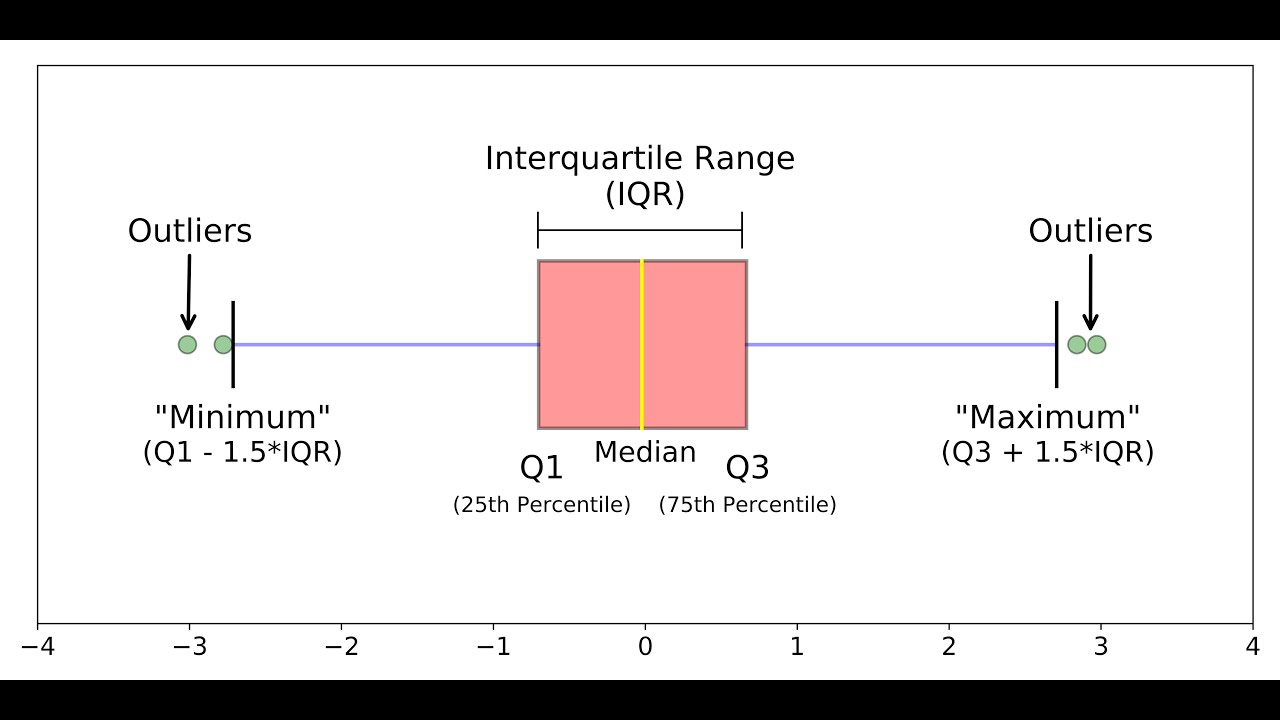

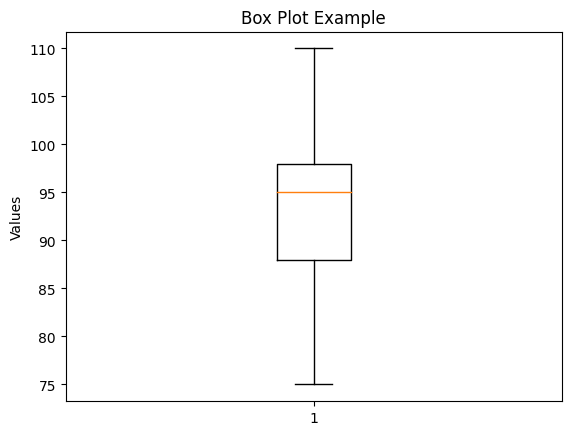

In [31]:
# Sample data
data = [75, 82, 85, 88, 90, 92, 95, 96, 97, 98, 100, 105, 110]

# Create a box plot
plt.boxplot(data)

# Add a title and labels
plt.title('Box Plot Example')
plt.ylabel('Values')

# Display the plot
plt.show()



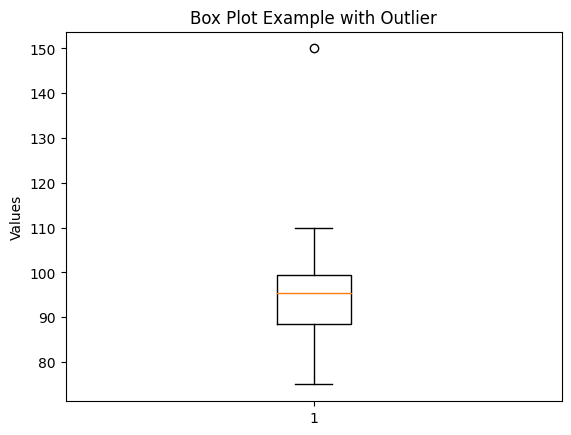

In [24]:
# Sample data with an outlier
data = [75, 82, 85, 88, 90, 92, 95, 96, 97, 98, 100, 105, 110, 150]  # Added outlier 150

# Create a box plot
plt.boxplot(data)

# Add a title and labels
plt.title('Box Plot Example with Outlier')
plt.ylabel('Values')

# Display the plot
plt.show()


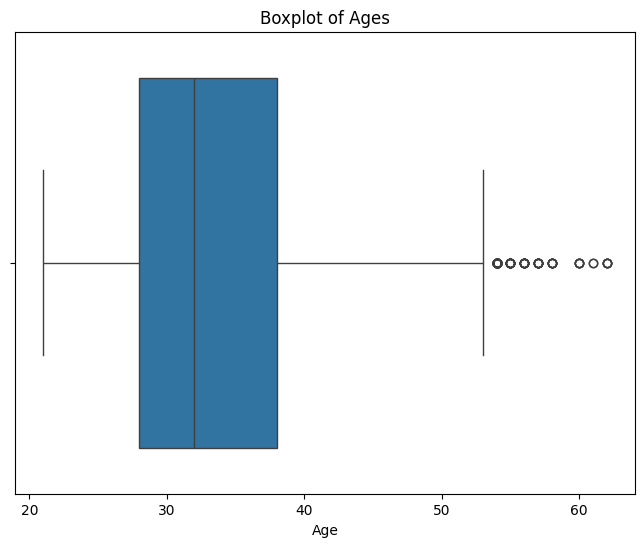

In [40]:
# Create a boxplot for the 'Age' column using Seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x=salary_df['Age'])
plt.xlabel('Age')
plt.title('Boxplot of Ages')
plt.show()

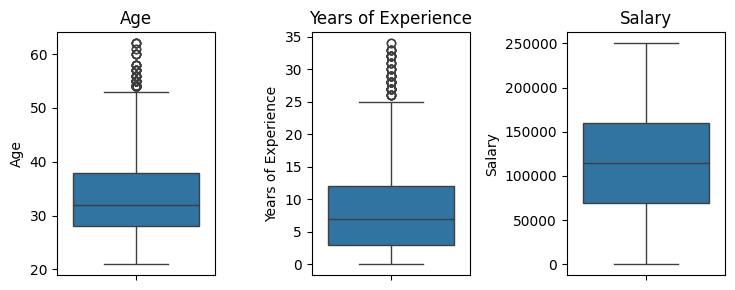

In [36]:
# Draw box plots of numerical columns using subplots
numeric_cols = salary_df.select_dtypes(include=['int64', 'float64']).columns


# Adjusting the subplot grid size to accommodate all numeric columns
num_cols = len(numeric_cols)
num_rows = (num_cols // 4) + (1 if num_cols % 4 else 0)  # Adjust the number of rows in the grid

plt.figure(figsize=(10, num_rows * 3))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, 4, i)
    sns.boxplot(data=salary_df[col])
    plt.title(col)

plt.tight_layout()
plt.show()